<a href="https://colab.research.google.com/github/HURU-School/Data-Science/blob/main/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis in Python

Basic Exploratory Data Analysis using Python Libraries
Initially written by Lawrence Moruye and modified by HURU School data Science Team

Note: 


*   R is mostly for Research
*   Python is for production





In [15]:
!mkdir data # Here we are just making a data directory called data

mkdir: cannot create directory ‘data’: File exists


In [16]:
!wget -P data https://raw.githubusercontent.com/ogunlao/HousePricePrediction/master/train.csv # Here we get data using wget into our folder

--2021-05-05 04:35:43--  https://raw.githubusercontent.com/ogunlao/HousePricePrediction/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘data/train.csv.1’

train.csv.1         100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2021-05-05 04:35:44 (10.7 MB/s) - ‘data/train.csv.1’ saved [460676/460676]



In [17]:
path = '/content/data' # create a variable with your path name


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# show all df columns and diplay plots in line
pd.set_option('display.max_columns', None)
%matplotlib inline

In [19]:
df_train = pd.read_csv(f"{path}/train.csv", index_col='Id') #import the data

In [20]:
df_train.shape

(1460, 80)

In [21]:
df_train.info() # Gives you the columns as rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [22]:
df_train.head() # We view the head of the data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
col_to_use = ["YearRemodAdd", "YrSold", "GrLivArea", "Alley", "MSZoning", "BsmtCond", "Street", "OverallQual", "SalePrice"] #Here we subset the columns we'll use

df_train = df_train[col_to_use].copy() # we copy the columns we want to work with

# Detecting Outliers

An outlier is a point that deviates from the rest


- Inorder to do this, we have to plot our features

- Outliers maybe as a result of mistakes in data collection

In [24]:
?? plt.subplots()

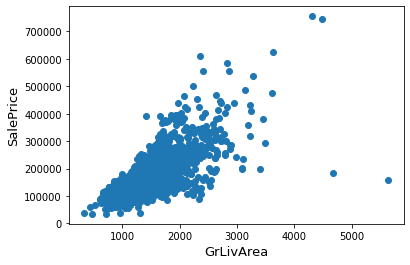

In [25]:
'''

we plot a scatter plot GrLivArea on x-axis vs SalePrice on y-axis

'''
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)#label on y axis,we increase font size to 13
plt.xlabel('GrLivArea', fontsize=13)#label on x axis,we increase font size to 13
plt.show()#plot our graph

In [26]:
# Deleting outliers
'''
From the above graph,we see 2 data points to the lower left.
This is an example of noise

'''
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

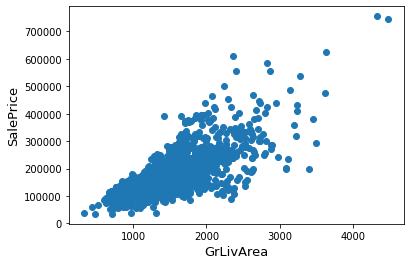

In [27]:
#Check the graphic again to see if the outliers are still existing


fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Missing Values

Most data science or ml models require data with no missing values we need to check if our data has any missing values

In [28]:
'''
In Pandas ,we use isnull() function
we sum the number of missing values per column
we sort them in descending order by setting ascending to False
'''
df_train.isnull().sum().sort_values(ascending = False)

Alley           1367
BsmtCond          37
SalePrice          0
OverallQual        0
Street             0
MSZoning           0
GrLivArea          0
YrSold             0
YearRemodAdd       0
dtype: int64

In [29]:
'''
from above,
we see Alley has most missing values,we may decide to delete/drop this column
# Some  also has a few missing BsmtCond
we fill BsmtCond with 'None',since it is categorical column
also remember to set inplace to True
'''
values = {
          "BsmtCond": "None",           
          }

df_train.fillna(value=values, inplace=True)

In [30]:
del df_train['Alley'] #delete Alley

In [31]:
#check for null values again
#we have none
df_train.isnull().sum().sort_values(ascending = False)

SalePrice       0
OverallQual     0
Street          0
BsmtCond        0
MSZoning        0
GrLivArea       0
YrSold          0
YearRemodAdd    0
dtype: int64

**Feature Engineering**

- It is a way of creating more features.Most probably from domain known or the trends in the data and/ any logic

- There is no defined method of doing it

- We can also consider Converting categorical columns to numerical has part of feature engineering

In [32]:
# Create feature(houseage) indicating age of house after renovation
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearRemodAdd']


In [36]:
# Change convert all low ages to zero ,we cant have a house with negative age

df_train['HouseAge'][df_train['HouseAge'] < 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
# looking for unique values

df_train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [38]:
'''
we can replace Grvl with 1 and Grvl with 2
we can use a dictionary in this case as shown below

Convert some categorial vatiables to numerical where there is order
'''
replacement_str = {"Grvl": 1, "c": 2}

df_train = df_train.replace({
                        'Street': replacement_str,
                        })

In [39]:
df_train["OverallQual"].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [40]:
'''
Create new features by binning of an existing feature.
For example OverallQual takes values from 1 to 10,but we may want to classify this into 3 categories i.e,bad,average and good
This is very useful for linear models
1,2,3-----bad
4,5,6-----average
7,8,9,10-----good
'''
# 1* Simplifications of existing features
df_train["SimplOverallQual"] = df_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

In [41]:
# Divide features into numerical and categorical features

df_train_num = df_train.select_dtypes(include = [np.number])
df_train_num.columns
#df_train_cat = df_train.select_dtypes(include = ['object'])

Index(['YearRemodAdd', 'YrSold', 'GrLivArea', 'OverallQual', 'SalePrice',
       'HouseAge', 'SimplOverallQual'],
      dtype='object')

In [42]:
df_le = df_train.copy()#lets  copy our dataset and demonsstrate label encodinf


In [43]:
df_le.head()#MSZoning is categorical,we want to make it numerical

,YearRemodAdd,YrSold,GrLivArea,MSZoning,BsmtCond,Street,OverallQual,SalePrice,HouseAge,SimplOverallQual
Id,,,,,,,,,,
1,2003,2008,1710,RL,TA,Pave,7,208500,5,3
2,1976,2007,1262,RL,TA,Pave,6,181500,31,2
3,2002,2008,1786,RL,TA,Pave,7,223500,6,3
4,1970,2006,1717,RL,Gd,Pave,7,140000,36,3
5,2000,2008,2198,RL,TA,Pave,8,250000,8,3


LabelEncoding of Categorical Variables

In [44]:
'''
we can also use label encoder from sklearn to convert our categoricl features toi numerical
for example we went to  MSZoning
'''
from sklearn.preprocessing import LabelEncoder# import label encoder
le = LabelEncoder()#instantiate our encoder
df_le['MSZoning']=le.fit_transform(df_le['MSZoning'])


In [45]:
df_le.head()#MSZoning is now numerical

,YearRemodAdd,YrSold,GrLivArea,MSZoning,BsmtCond,Street,OverallQual,SalePrice,HouseAge,SimplOverallQual
Id,,,,,,,,,,
1,2003,2008,1710,3,TA,Pave,7,208500,5,3
2,1976,2007,1262,3,TA,Pave,6,181500,31,2
3,2002,2008,1786,3,TA,Pave,7,223500,6,3
4,1970,2006,1717,3,Gd,Pave,7,140000,36,3
5,2000,2008,2198,3,TA,Pave,8,250000,8,3


# Duplicates

In [49]:
'''
Lets create dummy dataset with 3 columns,we have some duplicated rows
'''
students = [('Erasto', 34, 'Nairobi'),
            ('Gitumbu', 30, 'Nairobi'),
            ('Oluoch', 36, 'Nairobi'),
            ('Muthoni', 30, 'Nairobi'),
            ('Qondeni', 30, 'Nairobi'),
            ('Qondeni', 30, 'Mombasa'),
            ('Muthoni', 30, 'Nairobi'),
            ('Gitumbu', 30, 'Nairobi')
            ]
# Create a DataFrame object
df = pd.DataFrame(students, columns=['Name', 'Age', 'City'])

In [56]:
df#lets visualize our dataset

,Name,Age,City
0,Erasto,34,Nairobi
1,Gitumbu,30,Nairobi
2,Oluoch,36,Nairobi
3,Muthoni,30,Nairobi
4,Qondeni,30,Nairobi
5,Qondeni,30,Mombasa
6,Muthoni,30,Nairobi
7,Gitumbu,30,Nairobi


In [55]:
new_data=df[df.duplicated()]#we use duplicated in pandas to filter out the duplicated rows aand assign our result to new_data

In [ ]:
new_data #we can see row 1 and 7 are similar and rows 3and 6 are same.Pandas will select the duplicated instances

,Name,Age,City
6,Muthoni,30,Nairobi
7,Gitumbu,30,Nairobi


In [53]:
duplicate = df[df.duplicated(['Name'])]#we can also chech duplicated instances based on column,in this case Name

In [54]:
duplicate

,Name,Age,City
5,Qondeni,30,Mombasa
6,Muthoni,30,Nairobi
7,Gitumbu,30,Nairobi


In [57]:
df=df.drop_duplicates(keep='first') #in pandas we use drop_duplicates and drop all duplicated instances,if we want to keep the first instance,we set keep=True

In [58]:
df #we now see that all duplicated rows have been dropped

,Name,Age,City
0,Erasto,34,Nairobi
1,Gitumbu,30,Nairobi
2,Oluoch,36,Nairobi
3,Muthoni,30,Nairobi
4,Qondeni,30,Nairobi
5,Qondeni,30,Mombasa


In [59]:
df=df.drop_duplicates(subset=['Name'])# what if we want to drop duplicated based on Name?se set subset to the column name

In [60]:
df

,Name,Age,City
0,Erasto,34,Nairobi
1,Gitumbu,30,Nairobi
2,Oluoch,36,Nairobi
3,Muthoni,30,Nairobi
4,Qondeni,30,Nairobi
